# Activity - Python Basics, NDBC Weather Data, & ARGO float data


*Modified from REU 2020 work by Sage Lichtenwalner, Rutgers University, June 9, 2020*


In this notebook, some of the basics of programming Python is presented.  If you want to lean more, there are lots of other resources and training sessions out there, including the official [Python Tutorial](https://docs.python.org/3/tutorial/).  But for basic oceanographic data analysis, you don't really need to know all the ins-and-outs of programming (though it helps), especially when just starting out.  

This will cover many of the basic recipes you need to:
* Quickly load some data
* Make some quick plots, and make them look good
* Investigate surface buoy time series and ARGO-derived profiles



#ARGO BUOY DATA

In this section we will cover some of basics of loading and plotting [ARGO](https://www.aoml.noaa.gov/phod/argo/) drifter in python.

Because this dataset inclues a depth dimension, this allows us to demonstrate several addtional graph types you will commonly see in oceanography, including profiles and TS (temperature-salinity) diagrams.

### Additional Intros and References
[2019 Data Labs Quick Intro to Pytyon](https://github.com/ooi-data-lab/data-lab-workshops/blob/master/Summer_Examples/Python_Introduction.ipynb)

[2018 Python Basics for Matlab Wizards](https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/extras2/Python_Basics_for_Matlab_Wizards.ipynb)

[Rowe Getting Started with Python](https://github.com/prowe12/python_resources/blob/master/Introduction_to_python3.ipynb)

In [2]:
#Set up relevant libraries 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

print('done')

done


# ARGO Drifter Data
The ocean is a deep place with a lot of interesting features and processes that vary with depth.  

Thus, it's important to be able to visualize data in ways that emphasize the depth dimension.

To do so, we're going to load data from the [Global Argo Float](http://www.argo.ucsd.edu) program, which had 3,962 active drifters around the world as of 6/6/2020.
![Argo Floats](http://www.argo.ucsd.edu/status.jpg)

Unfortunately, because of the complexity and international nature of the program, there isn't one "perfect" source to retrieve Argo data, or even to search for drifters you may be interested in.  However, I found the following sites helpful.

* [SCCOM Floats](https://www.mbari.org/science/upper-ocean-systems/chemical-sensor-group/soccom-float-visualization/) - A great interactive visualization of active floats in the Southern Ocean. You can also create quick plots and download CSV formatted data using [SOCCOMViz](https://www.mbari.org/science/upper-ocean-systems/chemical-sensor-group/soccomviz/).
* [Global Argo Data Repository](https://www.ncei.noaa.gov/products/global-argo-data-repository) - A great place to grab drifter data files in netcdf format, once you know what drifter ID you want. (We'll actually use this site below.)
* [Euro Argo Map](https://fleetmonitoring.euro-argo.eu/dashboard) - A relatively new interactive portal to search for drifters and see their recent tracks and data.
* [A beginner's guide to accessing Argo data](http://www.argo.ucsd.edu/Argo_date_guide.html) - More information on the data.
* [Old Euro Argo Site](https://www.euro-argo.eu/Activities/Data-Management/Access-to-data-note-this-website-is-currently-under-revision-and-will-be-updated-in-2020) - May or may not work 

For the purposes of this activity, I picked an active drifter at random. 

**Let's see what #5906017 can tell us about the ocean.**

In [37]:
# Let's download a datafile to our server (see the files tab to see that the .nc file was indeed imported)
!wget https://data.nodc.noaa.gov/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc

--2021-11-09 14:26:59--  https://data.nodc.noaa.gov/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc
Resolving data.nodc.noaa.gov (data.nodc.noaa.gov)... 205.167.25.172, 205.167.25.178, 205.167.25.168, ...
Connecting to data.nodc.noaa.gov (data.nodc.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc [following]
--2021-11-09 14:27:00--  https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.167, 205.167.25.168, 205.167.25.177, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1412680 (1.3M) [application/x-netcdf]
Saving to: ‘nodc_5906017_prof.nc.3’

100%[======================================>] 1,412,680   3.93MB/s   in 0.3s   

2021-11-09 14:27:00 (3.

In [39]:
# Load the dataset using xarray
data = xr.open_dataset('nodc_5906017_prof.nc')
data

# Check out the data variables and their specific dimensions
# nprof is number of profiles but can be thought of as time to some degree
# since the profiles are ordered in time

<xarray.Dataset>
Dimensions:                       (n_prof: 57, n_param: 3, n_levels: 511, n_calib: 1, n_history: 0)
Dimensions without coordinates: n_prof, n_param, n_levels, n_calib, n_history
Data variables: (12/65)
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    ...                            ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_history, n_prof) object ...
    crs                           int32 ...
Attributes: (12/49)
    title:                           Argo float vertical profile
    institution:                     FR GDAC
    source:                          Argo float
    history:                         2020-09-15T08:36:57Z boyer convAGDAC.f90...
    references:                      https://www.nodc.noaa.gov/argo/
    user_manual_version:             3.1
    ...                              ...
    time_coverage_end:               2020-09-13T22:38:46Z
    time_coverage_duration:          point
    time_coverage_resolution:        point
    gadr_ConventionVersion:          GADR-3.0
    gadr_program:                    convAGDAC.f90
    gadr_programVersion:             1.2

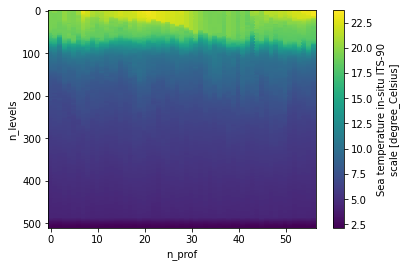

In [40]:
# Quick Timeseries Profile plot of Temperature
data.temp_adjusted.T.plot()
plt.gca().invert_yaxis()

## Profile Plot
Now that we have the dataset loaded, let's create a profile plot of a single profile.

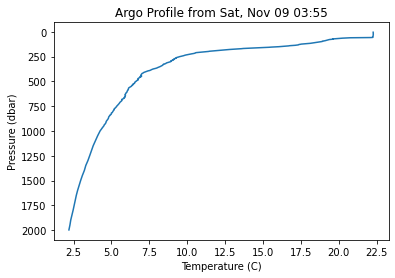

In [41]:
# Profile Plot
nprof = 25 #Specify a profile to plot
plt.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof])

plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (dbar)') #one dbar = 1 decibar = 0.1bar. Atmospheric pressure = 1000mb = 1bar = 10dbar (on avg)
plt.title('Argo Profile from %s' % data.juld[nprof].dt.strftime('%a, %b %d %H:%M').values)

plt.gca().invert_yaxis() #Flip the y-axis

Now let's get a little fancier and plot profiles of 2 variables.

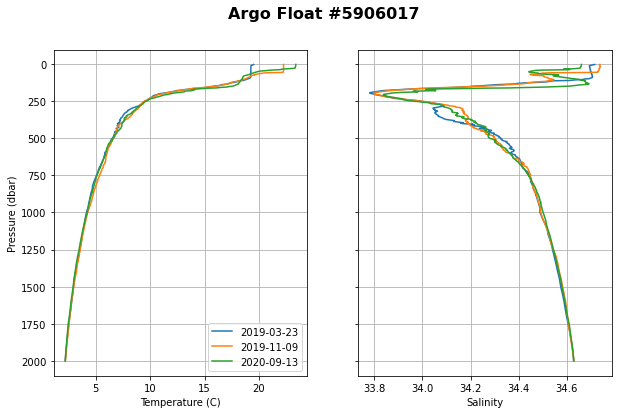

In [42]:
# Profile Plot
# Subplot example
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

nprof = 0 # First profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = 25 # Middle-ish (in time) profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = -1 # Last profile in time
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.invert_yaxis()
ax1.legend()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold', fontsize=16);

## T-S Diagram
Another popular plot in oceanography is the [T-S Diagram](https://en.wikipedia.org/wiki/Temperature–salinity_diagram), or Temperature-Salinity plot.  It is commonly used to diagnose water masses in the global ocean, and to compare density stability of a water column profile (especially when lines of constant density are also included).

Basically, it's just a scatterplot of temp and salinity.

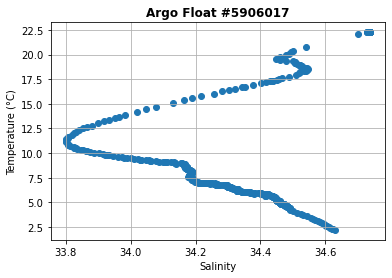

In [43]:
# TS Diagram
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.title('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold');

Lovely, but we can also use a colored scatterplot to show the depth dimension.

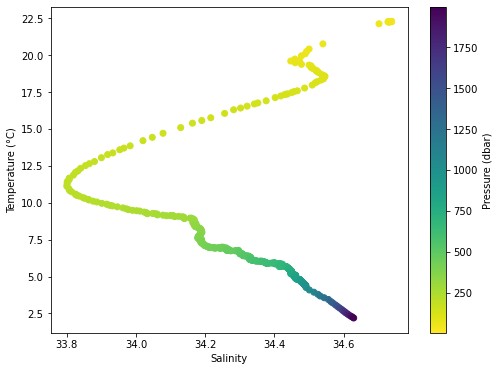

In [44]:
# T-S Diagram with depth
plt.figure(figsize=(8,6))

nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')

cbh = plt.colorbar();
cbh.set_label('Pressure (dbar)')

We used the default python colorbar for this plot (viridis), but there is a much larger [colormap collection](https://matplotlib.org/users/colormaps.html) available.

With a little bit more code, we can add lines of constant density.  

To calculate density, we will need the wonderful [seawater](https://pythonhosted.org/seawater/index.html) library.

In [45]:
!pip install seawater
import seawater
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


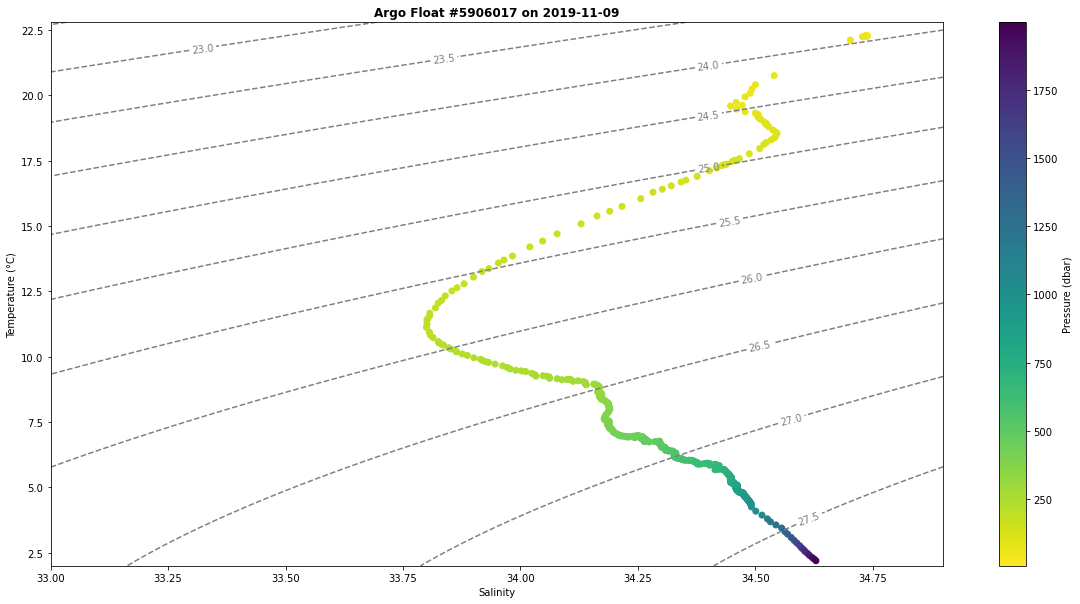

In [46]:
# TS Diagram with density contours
plt.figure(figsize=(20,10))  #go big or go home!

# Calculate the density lines
#Changing up x and y axes for the new buoy data

x = np.arange(33, 35, .1)
#x = np.arange(33.75, 34.75, .1)

y = np.arange(2, 23, .2)
#y = np.arange(-2, 2, .1)



X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
#changing levels so we get more info
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.5))
#CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(26.5,28,.1))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')
plt.title('Argo Float #%d on %s' % (data.platform_number[nprof].values, data.juld[nprof].dt.strftime('%Y-%m-%d').values), fontweight='bold');

# Add a colorbar
cbh = plt.colorbar(label='Pressure (dbar)');

## Float Track Map

because it's nice to know where on Earth these profiles are from

/pl/active/courses/2020_fall/ATOC_BLM/software/anaconda/envs/tutorial_2020/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


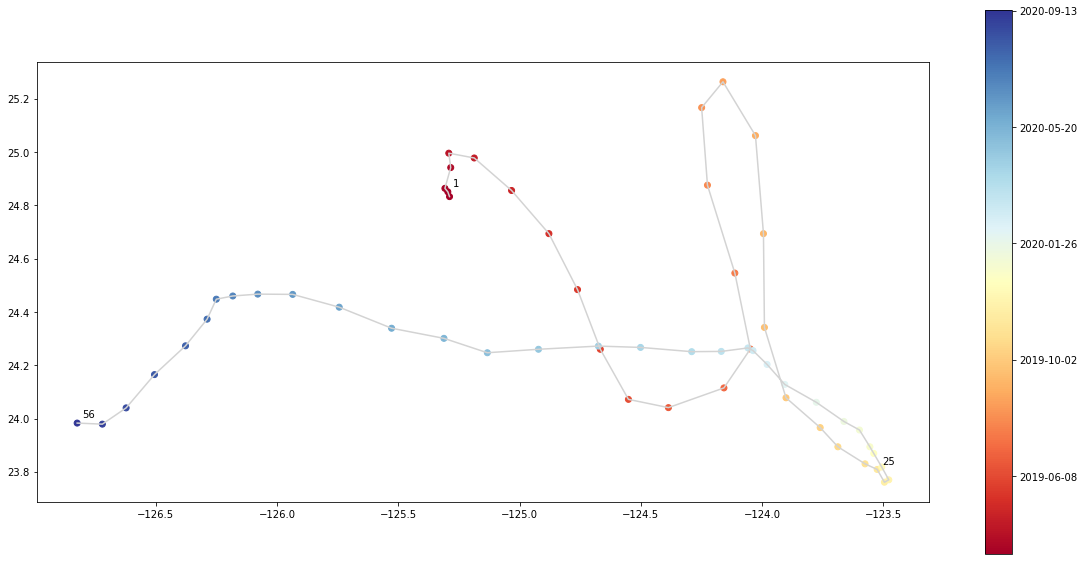

In [48]:
# Simple map of a float track
plt.figure(figsize=(20,10))
plt.plot(data.longitude, data.latitude, c='lightgrey')
plt.scatter(data.longitude, data.latitude, c=data.juld, cmap='RdYlBu')

# Crude profile labels in a loop over the index jj
for jj in [1,25,-1]:
  plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

Let's have a try using Cartopy so we can see where the buoy is in relation to continents.

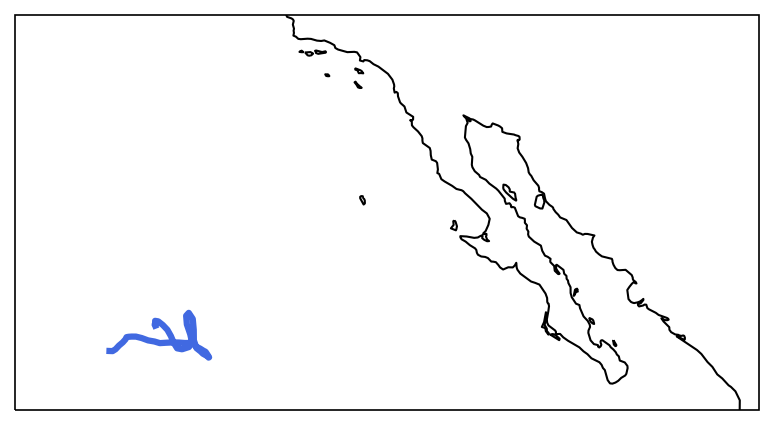

In [50]:

fig = plt.figure(figsize=(6.4,4.8),dpi=150)  
ax = plt.axes(projection=ccrs.PlateCarree())

#need to change axis ranges for the new buoy (given graph above
ax.set_extent([-130, -105, 22, 35])
#ax.set_extent([-130, -40, -80, -40])


# Basemaps

ax.coastlines('50m', linewidth=1)

ax.plot(data.longitude, data.latitude, linewidth=3, color='royalblue');

Try running those same steps with float 5905077 (see wget below). 

To find your own buoy instead, take these steps
1. Go to https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/
2. Click a folder
3. Hover over nc file and right click --> copy link address
5. Paste below in wget line. Don't forget to reference the correct data file in data command

These files are real data so may have missing variables or very limited profiles. Choose a different file if your data is lacking or use 5905077. You'll have to modify much more code if your buoy has less than 26 profiles. 
 
A couple things to look out for
1. You will likely have to tinker with the x, y, and levels arrays in the Temp vs. Salinity w/ density plot. Set x and y according to the ranges listed in graphs auto-made above that plot. Tinker to get density levels and interval correct
2. You will have to change ax.set_extent for final Buoy Track map. Base this on the auto-made track map above the final one. 



In [51]:

!wget https://data.nodc.noaa.gov/argo/gadr/data/aoml/5905077/nodc_5905077_prof.nc
data = xr.open_dataset('nodc_5905077_prof.nc')
data


--2021-11-09 14:27:41--  https://data.nodc.noaa.gov/argo/gadr/data/aoml/5905077/nodc_5905077_prof.nc
Resolving data.nodc.noaa.gov (data.nodc.noaa.gov)... 205.167.25.178, 205.167.25.168, 205.167.25.172, ...
Connecting to data.nodc.noaa.gov (data.nodc.noaa.gov)|205.167.25.178|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5905077/nodc_5905077_prof.nc [following]
--2021-11-09 14:27:41--  https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5905077/nodc_5905077_prof.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.171, 205.167.25.177, 205.167.25.172, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3175340 (3.0M) [application/x-netcdf]
Saving to: ‘nodc_5905077_prof.nc.3’

100%[======================================>] 3,175,340   6.39MB/s   in 0.5s   

2021-11-09 14:27:42 (6.

<xarray.Dataset>
Dimensions:                       (n_prof: 131, n_param: 3, n_levels: 502, n_calib: 1, n_history: 0)
Dimensions without coordinates: n_prof, n_param, n_levels, n_calib, n_history
Data variables: (12/65)
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    ...                            ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_history, n_prof) object ...
    crs                           int32 ...
Attributes: (12/49)
    title:                           Argo float vertical profile
    institution:                     FR GDAC
    source:                          Argo float
    history:                         2020-09-24T09:00:53Z boyer convAGDAC.f90...
    references:                      https://www.nodc.noaa.gov/argo/
    user_manual_version:             3.1
    ...                              ...
    time_coverage_end:               2020-09-18T22:57:13Z
    time_coverage_duration:          point
    time_coverage_resolution:        point
    gadr_ConventionVersion:          GADR-3.0
    gadr_program:                    convAGDAC.f90
    gadr_programVersion:             1.2

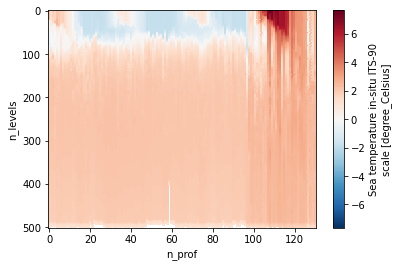

In [52]:
# Quick Timeseries Profile plot of Temperature
data.temp_adjusted.T.plot()
plt.gca().invert_yaxis()

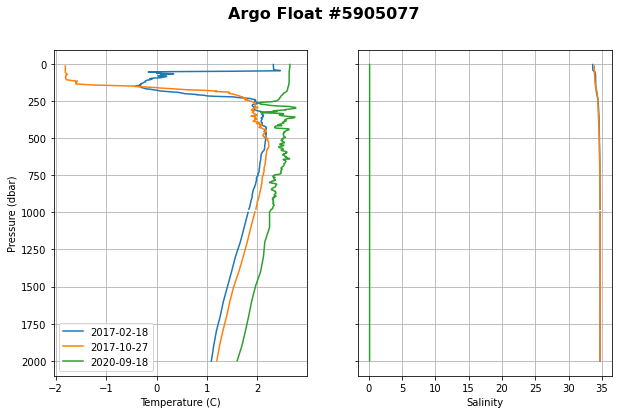

In [53]:
# Your Turn - Profile plot
#Going straight to fancy
# Profile Plot
# Subplot example
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

nprof = 0 # First profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = 25 # Middle-ish (in time) profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = -1 # Last profile in time
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.invert_yaxis()
ax1.legend()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold', fontsize=16);

Welcome to the world of real data. I wouldn't trust that zero salinity curve.

I'll carry through this new buoy to below.

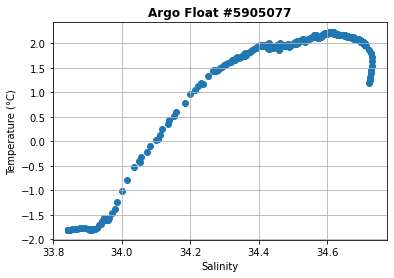

In [54]:
# TS Diagram
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.title('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold');

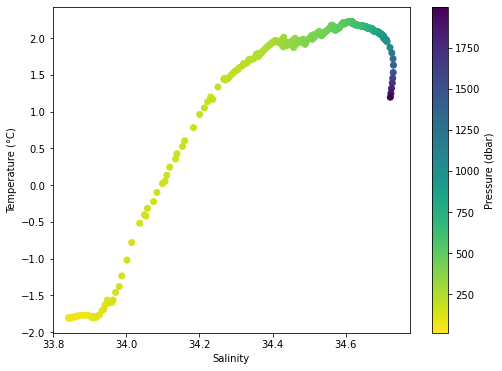

In [55]:
# T-S Diagram with depth
plt.figure(figsize=(8,6))

nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')

cbh = plt.colorbar();
cbh.set_label('Pressure (dbar)')

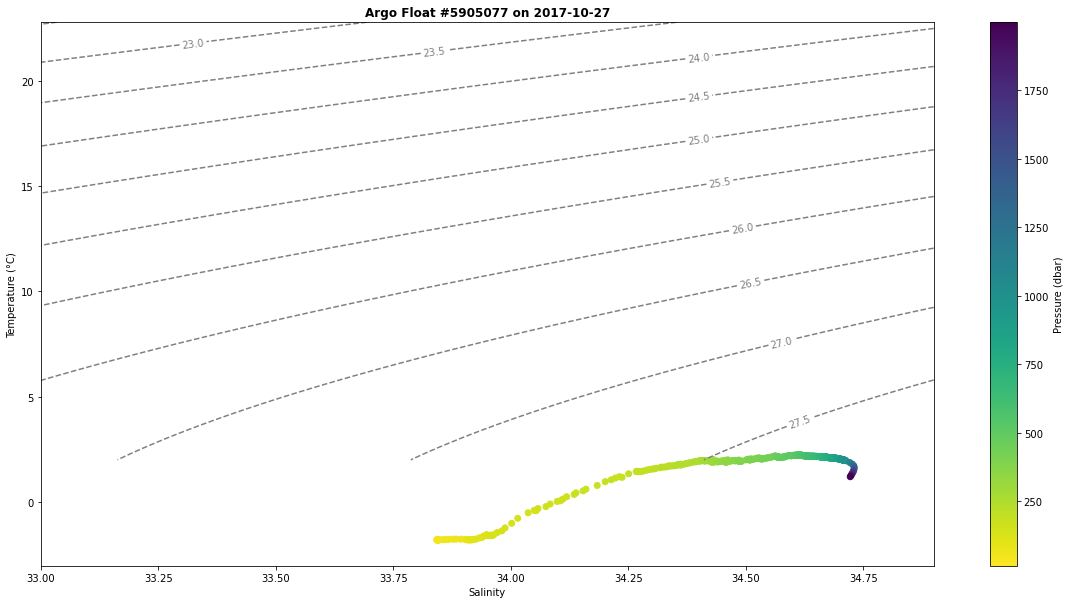

In [56]:
# TS Diagram with density contours
plt.figure(figsize=(20,10))  #go big or go home!

y = np.arange(2, 23, .2)
x = np.arange(33, 35, .1)

X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
#changing levels so we get more info
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.5))
#WILL NEED TO CHANGE LEVELS ABOVE

plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')
plt.title('Argo Float #%d on %s' % (data.platform_number[nprof].values, data.juld[nprof].dt.strftime('%Y-%m-%d').values), fontweight='bold');

# Add a colorbar
cbh = plt.colorbar(label='Pressure (dbar)');

This profile looks like polar waters! Very cold with a weak salinity change

Float Track Map
because it's nice to know where on Earth these profiles are from

/pl/active/courses/2020_fall/ATOC_BLM/software/anaconda/envs/tutorial_2020/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


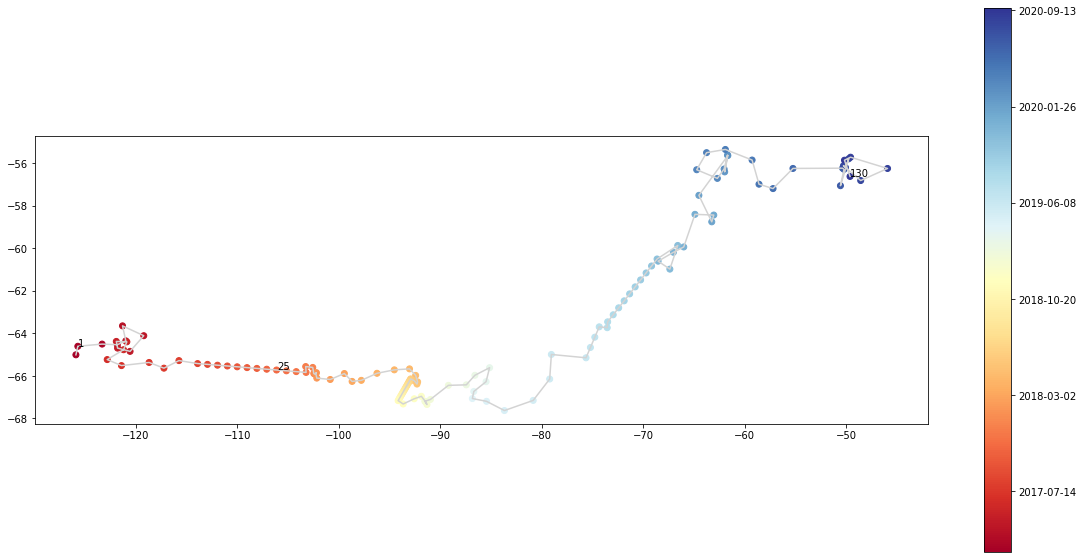

In [57]:
# Simple map of a float track
plt.figure(figsize=(20,10))
plt.plot(data.longitude, data.latitude, c='lightgrey')
plt.scatter(data.longitude, data.latitude, c=data.juld, cmap='RdYlBu')

# Crude profile labels
for jj in [1,25,-1]:
  plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

Let's have a try using Cartopy so we can see where the buoy is in relation to continents.

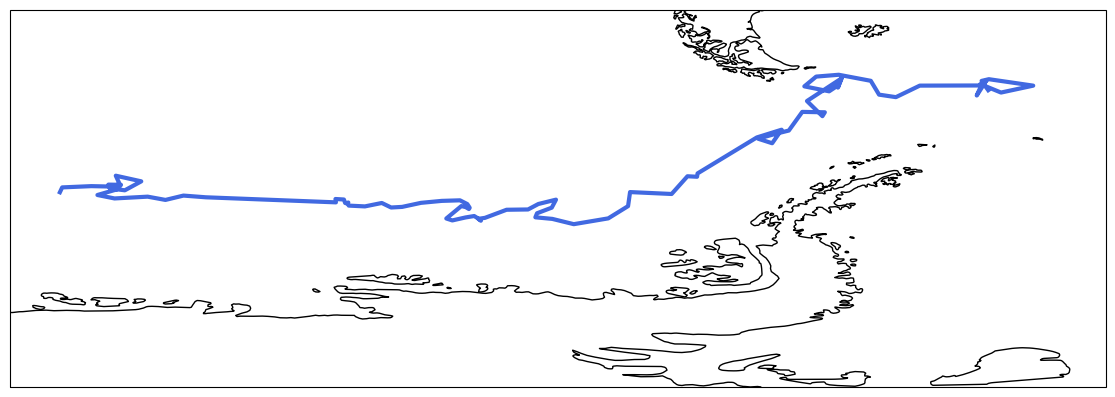

In [68]:
fig = plt.figure(figsize=(15,5),dpi=100)  
ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-130, -40, -78, -50])
#WILL NEED TO CHANGE ABOVE TO CAPTURE TRACK

# Basemaps

ax.coastlines('50m', linewidth=1)
ax.plot(data.longitude, data.latitude, linewidth=3, color='royalblue');